
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
image 1/1 /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/images/frame_1.jpg: 384x640 2 persons, 323.0ms
Speed: 9.0ms preprocess, 323.0ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)


[[     857.92      426.84]
 [     859.38      419.51]
 [     856.43      419.34]
 [     839.77      411.42]
 [     842.07      411.98]
 [     813.18      424.45]
 [     810.29      428.67]
 [     817.46      476.68]
 [     799.08      484.87]
 [      839.9      512.36]
 [     820.72      517.18]
 [     759.75      496.95]
 [     756.39      500.26]
 [     801.75      580.06]
 [     798.33      584.02]
 [      782.6      664.82]
 [     777.11      674.51]]


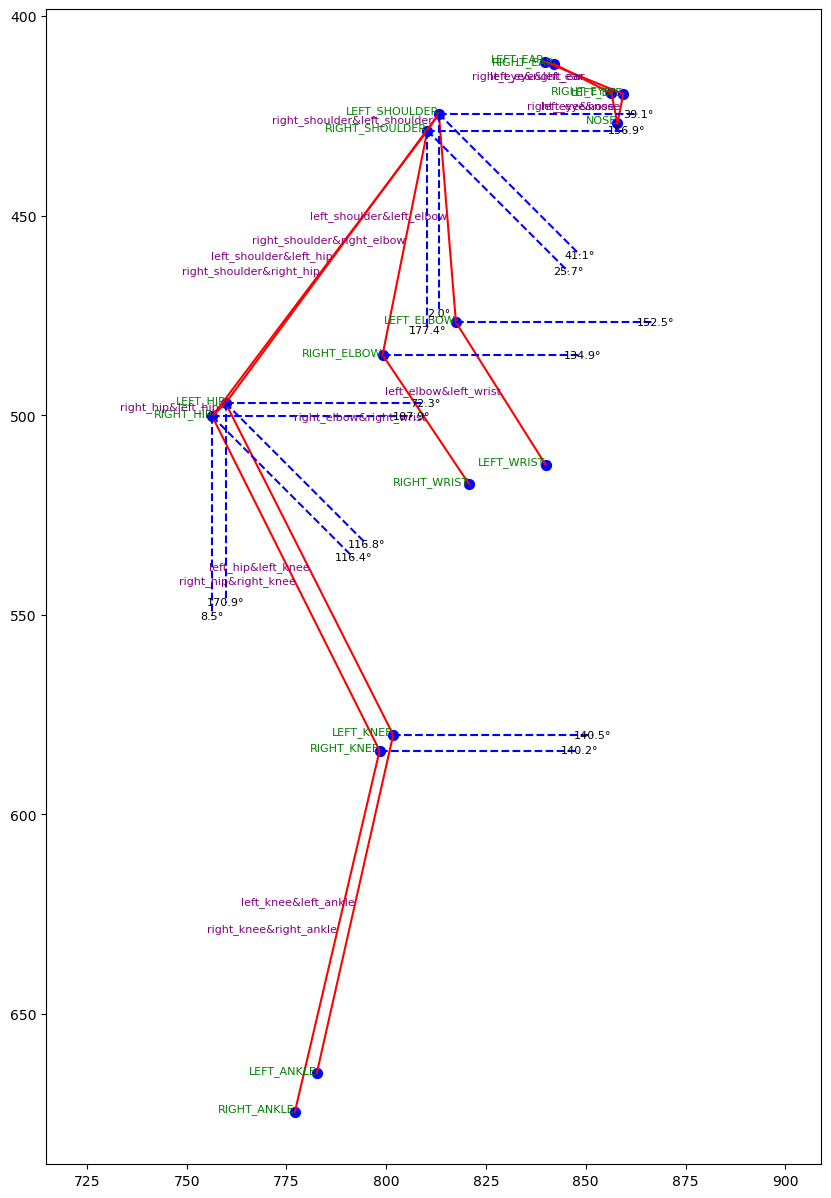

{'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist': '134.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder': '156.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip': '25.7°', 'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist': '152.5°', 'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder': '39.1°', 'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip': '41.1°', 'right_hip&right_knee - RIGHT_KNEE - right_knee&right_ankle': '140.2°', 'right_hip&right_knee - RIGHT_HIP - right_hip&left_hip': '107.9°', 'right_hip&right_knee - RIGHT_HIP - right_shoulder&right_hip': '116.4°', 'left_hip&left_knee - LEFT_KNEE - left_knee&left_ankle': '140.5°', 'left_hip&left_knee - LEFT_HIP - right_hip&left_hip': '72.3°', 'left_hip&left_knee - LEFT_HIP - left_shoulder&left_hip': '116.8°', 'right_shoulder&left_shoulder - RIGHT_SHOULDER - right_shoulder&right_hip': '177.4°', 'right_shoulder

In [5]:
import matplotlib.pyplot as plt
from pydantic import BaseModel
import numpy as np
from ultralytics import YOLO

class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16

class BodyKeypoints:
    def __init__(self, keypoints):
        get_keypoint = GetKeypoint()
        self.NOSE = keypoints[get_keypoint.NOSE]
        self.LEFT_EYE = keypoints[get_keypoint.LEFT_EYE]
        self.RIGHT_EYE = keypoints[get_keypoint.RIGHT_EYE]
        self.LEFT_EAR = keypoints[get_keypoint.LEFT_EAR]
        self.RIGHT_EAR = keypoints[get_keypoint.RIGHT_EAR]
        self.LEFT_SHOULDER = keypoints[get_keypoint.LEFT_SHOULDER]
        self.RIGHT_SHOULDER = keypoints[get_keypoint.RIGHT_SHOULDER]
        self.LEFT_ELBOW = keypoints[get_keypoint.LEFT_ELBOW]
        self.RIGHT_ELBOW = keypoints[get_keypoint.RIGHT_ELBOW]
        self.LEFT_WRIST = keypoints[get_keypoint.LEFT_WRIST]
        self.RIGHT_WRIST = keypoints[get_keypoint.RIGHT_WRIST]
        self.LEFT_HIP = keypoints[get_keypoint.LEFT_HIP]
        self.RIGHT_HIP = keypoints[get_keypoint.RIGHT_HIP]
        self.LEFT_KNEE = keypoints[get_keypoint.LEFT_KNEE]
        self.RIGHT_KNEE = keypoints[get_keypoint.RIGHT_KNEE]
        self.LEFT_ANKLE = keypoints[get_keypoint.LEFT_ANKLE]
        self.RIGHT_ANKLE = keypoints[get_keypoint.RIGHT_ANKLE]

def get_limbs_from_keypoints(keypoints: BodyKeypoints):
    limbs = {
        "right_eye&nose": [keypoints.RIGHT_EYE, keypoints.NOSE],
        "right_eye&right_ear": [keypoints.RIGHT_EYE, keypoints.RIGHT_EAR],
        "left_eye&nose": [keypoints.LEFT_EYE, keypoints.NOSE],
        "left_eye&left_ear": [keypoints.LEFT_EYE, keypoints.LEFT_EAR],
        "right_shoulder&right_elbow": [keypoints.RIGHT_SHOULDER, keypoints.RIGHT_ELBOW],
        "right_elbow&right_wrist": [keypoints.RIGHT_ELBOW, keypoints.RIGHT_WRIST],
        "left_shoulder&left_elbow": [keypoints.LEFT_SHOULDER, keypoints.LEFT_ELBOW],
        "left_elbow&left_wrist": [keypoints.LEFT_ELBOW, keypoints.LEFT_WRIST],
        "right_hip&right_knee": [keypoints.RIGHT_HIP, keypoints.RIGHT_KNEE],
        "right_knee&right_ankle": [keypoints.RIGHT_KNEE, keypoints.RIGHT_ANKLE],
        "left_hip&left_knee": [keypoints.LEFT_HIP, keypoints.LEFT_KNEE],
        "left_knee&left_ankle": [keypoints.LEFT_KNEE, keypoints.LEFT_ANKLE],
        "right_shoulder&left_shoulder": [keypoints.RIGHT_SHOULDER, keypoints.LEFT_SHOULDER],
        "right_hip&left_hip": [keypoints.RIGHT_HIP, keypoints.LEFT_HIP],
        "right_shoulder&right_hip": [keypoints.RIGHT_SHOULDER, keypoints.RIGHT_HIP],
        "left_shoulder&left_hip": [keypoints.LEFT_SHOULDER, keypoints.LEFT_HIP]
    }
    return limbs

selected_limbs = [
        "right_shoulder&right_elbow",
        "right_elbow&right_wrist",
        "left_shoulder&left_elbow",
        "left_elbow&left_wrist",
        "right_hip&right_knee",
        "right_knee&right_ankle",
        "left_hip&left_knee",
        "left_knee&left_ankle",
        "right_shoulder&left_shoulder",
        "right_hip&left_hip",
        "right_shoulder&right_hip",
        "left_shoulder&left_hip"
    ]
adjacent_limbs = []

model = YOLO('yolov8n-pose.pt')
img = 'images/frame_1.jpg'
results = model(img)
result_keypoint = results[0].keypoints.xy.cpu().numpy()[0]
print(result_keypoint)
body_keypoints = BodyKeypoints(result_keypoint)
limbs = get_limbs_from_keypoints(body_keypoints)

# Generating all possible combinations
for i in range(len(selected_limbs)):
    for j in range(i + 1, len(selected_limbs)):
        limb1 = limbs[selected_limbs[i]]
        limb2 = limbs[selected_limbs[j]]
        
        # Convert keypoints to tuples for comparison
        limb1_tuples = [tuple(point) for point in limb1]
        limb2_tuples = [tuple(point) for point in limb2]

        # Checking if any keypoint in the second limb matches with the keypoints in the first limb
        if any(kp in limb1_tuples for kp in limb2_tuples):
            adjacent_limbs.append((selected_limbs[i], selected_limbs[j]))

KEYPOINT_LABELS = [
    "NOSE", "LEFT_EYE", "RIGHT_EYE", "LEFT_EAR", "RIGHT_EAR", "LEFT_SHOULDER",
    "RIGHT_SHOULDER", "LEFT_ELBOW", "RIGHT_ELBOW", "LEFT_WRIST", "RIGHT_WRIST",
    "LEFT_HIP", "RIGHT_HIP", "LEFT_KNEE", "RIGHT_KNEE", "LEFT_ANKLE", "RIGHT_ANKLE"
]
            
def calculate_angle(A, B):
#     Calculate angle between two vectors A and B.
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return np.arccos(dot_product / (norm_A * norm_B)) * (180/np.pi)

def plot_keypoints_with_limbs(keypoints_coords, limbs):
    plt.figure(figsize=(10, 15))
    POINT_LABEL_COLOR = 'green'
    LINE_LABEL_COLOR = 'purple'
    INDICATOR_LINE_COLOR = 'orange'
    ANGLE_INDICATOR_LINE_COLOR = 'blue'
    ANGLE_LABEL_COLOR = 'black'
    OFFSET_ANGLES = [0, 45, 90, 135, 180, 225, 270, 315]
    angle_offsets = {}

    # Draw key points
    for idx, keypoint in enumerate(keypoints_coords):
        plt.scatter(*keypoint, s=50, color='blue')
        label_position = (keypoint[0] + 10, keypoint[1] + 15)  # Adjust the label position
#         plt.annotate(str(idx + 1), label_position, fontsize=12, ha='center', va='bottom', color='black')

        label_position = (keypoint[0] - 0.0005, keypoint[1])
        plt.annotate(KEYPOINT_LABELS[idx], label_position, fontsize=8, ha='right', color=POINT_LABEL_COLOR)

    # Draw lines and add labels
    for limb_name, limb in limbs.items():
        x_values = [limb[0][0], limb[1][0]]
        y_values = [limb[0][1], limb[1][1]]
        plt.plot(x_values, y_values, 'r-')

        mid_x = sum(x_values) / 2
        mid_y = sum(y_values) / 2
        offset = 0.02
        indicator_end_x = mid_x + offset
        indicator_end_y = mid_y + offset
        plt.plot([mid_x, indicator_end_x], [mid_y, indicator_end_y], '--', color=INDICATOR_LINE_COLOR)
        plt.annotate(limb_name, (indicator_end_x, indicator_end_y), fontsize=8, ha='right', color=LINE_LABEL_COLOR)

    # Calculate and annotate angles for adjacent limbs
    for limb_1_name, limb_2_name in adjacent_limbs:
        limb_1 = limbs[limb_1_name]
        limb_2 = limbs[limb_2_name]
        
        # Find common point
        common_point = None
        for point in limb_1:
            if any(np.array_equal(point, p) for p in limb_2):
                common_point = np.array(point)
                break

        if common_point is None:
            continue

        # Get vector A and B
        vector_A = np.array(limb_1[1]) - np.array(limb_1[0]) if np.array_equal(limb_1[1], common_point) else np.array(limb_1[0]) - np.array(limb_1[1])
        vector_B = np.array(limb_2[1]) - np.array(limb_2[0]) if np.array_equal(limb_2[1], common_point) else np.array(limb_2[0]) - np.array(limb_2[1])
        
        angle = calculate_angle(vector_A, vector_B)

        # Determine the offset for multiple angles at the same point
        if common_point.tobytes() not in angle_offsets:
            angle_offsets[common_point.tobytes()] = 0
        else:
            angle_offsets[common_point.tobytes()] += 1
        
        offset_angle = OFFSET_ANGLES[angle_offsets[common_point.tobytes()] % len(OFFSET_ANGLES)]
        offset_dx = 50 * np.cos(np.radians(offset_angle))
        offset_dy = 50 * np.sin(np.radians(offset_angle))
        
        end_point = common_point + np.array([offset_dx, offset_dy])

        plt.plot([common_point[0], end_point[0]], [common_point[1], end_point[1]], linestyle='--', color=ANGLE_INDICATOR_LINE_COLOR)
        plt.annotate(f"{angle:.1f}°", end_point, fontsize=8, ha='center', va='center', color=ANGLE_LABEL_COLOR)
        
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()
    
plot_keypoints_with_limbs(result_keypoint, limbs)

def calculate_and_get_angles_as_dict(keypoints_coords, limbs):
    angle_information = {}
    
    for limb_1_name, limb_2_name in adjacent_limbs:
        limb_1 = limbs[limb_1_name]
        limb_2 = limbs[limb_2_name]
        
        common_point = None
        for point in limb_1:
            if any(np.array_equal(point, p) for p in limb_2):
                common_point = point
                break
        
        if common_point is None:
            continue
        
        vector_A = np.array(limb_1[1]) - np.array(limb_1[0]) if np.array_equal(limb_1[1], common_point) else np.array(limb_1[0]) - np.array(limb_1[1])
        vector_B = np.array(limb_2[1]) - np.array(limb_2[0]) if np.array_equal(limb_2[1], common_point) else np.array(limb_2[0]) - np.array(limb_2[1])
        
        angle = calculate_angle(vector_A, vector_B)
        key = f"{limb_1_name} - {KEYPOINT_LABELS[np.where((result_keypoint == common_point).all(axis=1))[0][0]]} - {limb_2_name}"
        value = f"{angle:.1f}°"
        
        angle_information[key] = value
        
    return angle_information

angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)
print(angle_info_dict)

In [6]:
model = YOLO('yolov8n-pose.pt')
img = 'images/frame_1.jpg'
results = model(img)
keypoints_data = results[0].keypoints.xy.cpu().numpy()

for idx in range(len(keypoints_data)):
    result_keypoint = keypoints_data[idx]
    print(result_keypoint)
    body_keypoints = BodyKeypoints(result_keypoint)
    limbs = get_limbs_from_keypoints(body_keypoints)
    angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)
    print(angle_info_dict)


image 1/1 /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/images/frame_1.jpg: 384x640 2 persons, 99.7ms
Speed: 3.3ms preprocess, 99.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


[[     857.92      426.84]
 [     859.38      419.51]
 [     856.43      419.34]
 [     839.77      411.42]
 [     842.07      411.98]
 [     813.18      424.45]
 [     810.29      428.67]
 [     817.46      476.68]
 [     799.08      484.87]
 [      839.9      512.36]
 [     820.72      517.18]
 [     759.75      496.95]
 [     756.39      500.26]
 [     801.75      580.06]
 [     798.33      584.02]
 [      782.6      664.82]
 [     777.11      674.51]]
{'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist': '134.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder': '156.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip': '25.7°', 'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist': '152.5°', 'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder': '39.1°', 'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip': '41.1°', 'right_hip&right_knee - RIGHT_KNEE - right_knee&rig

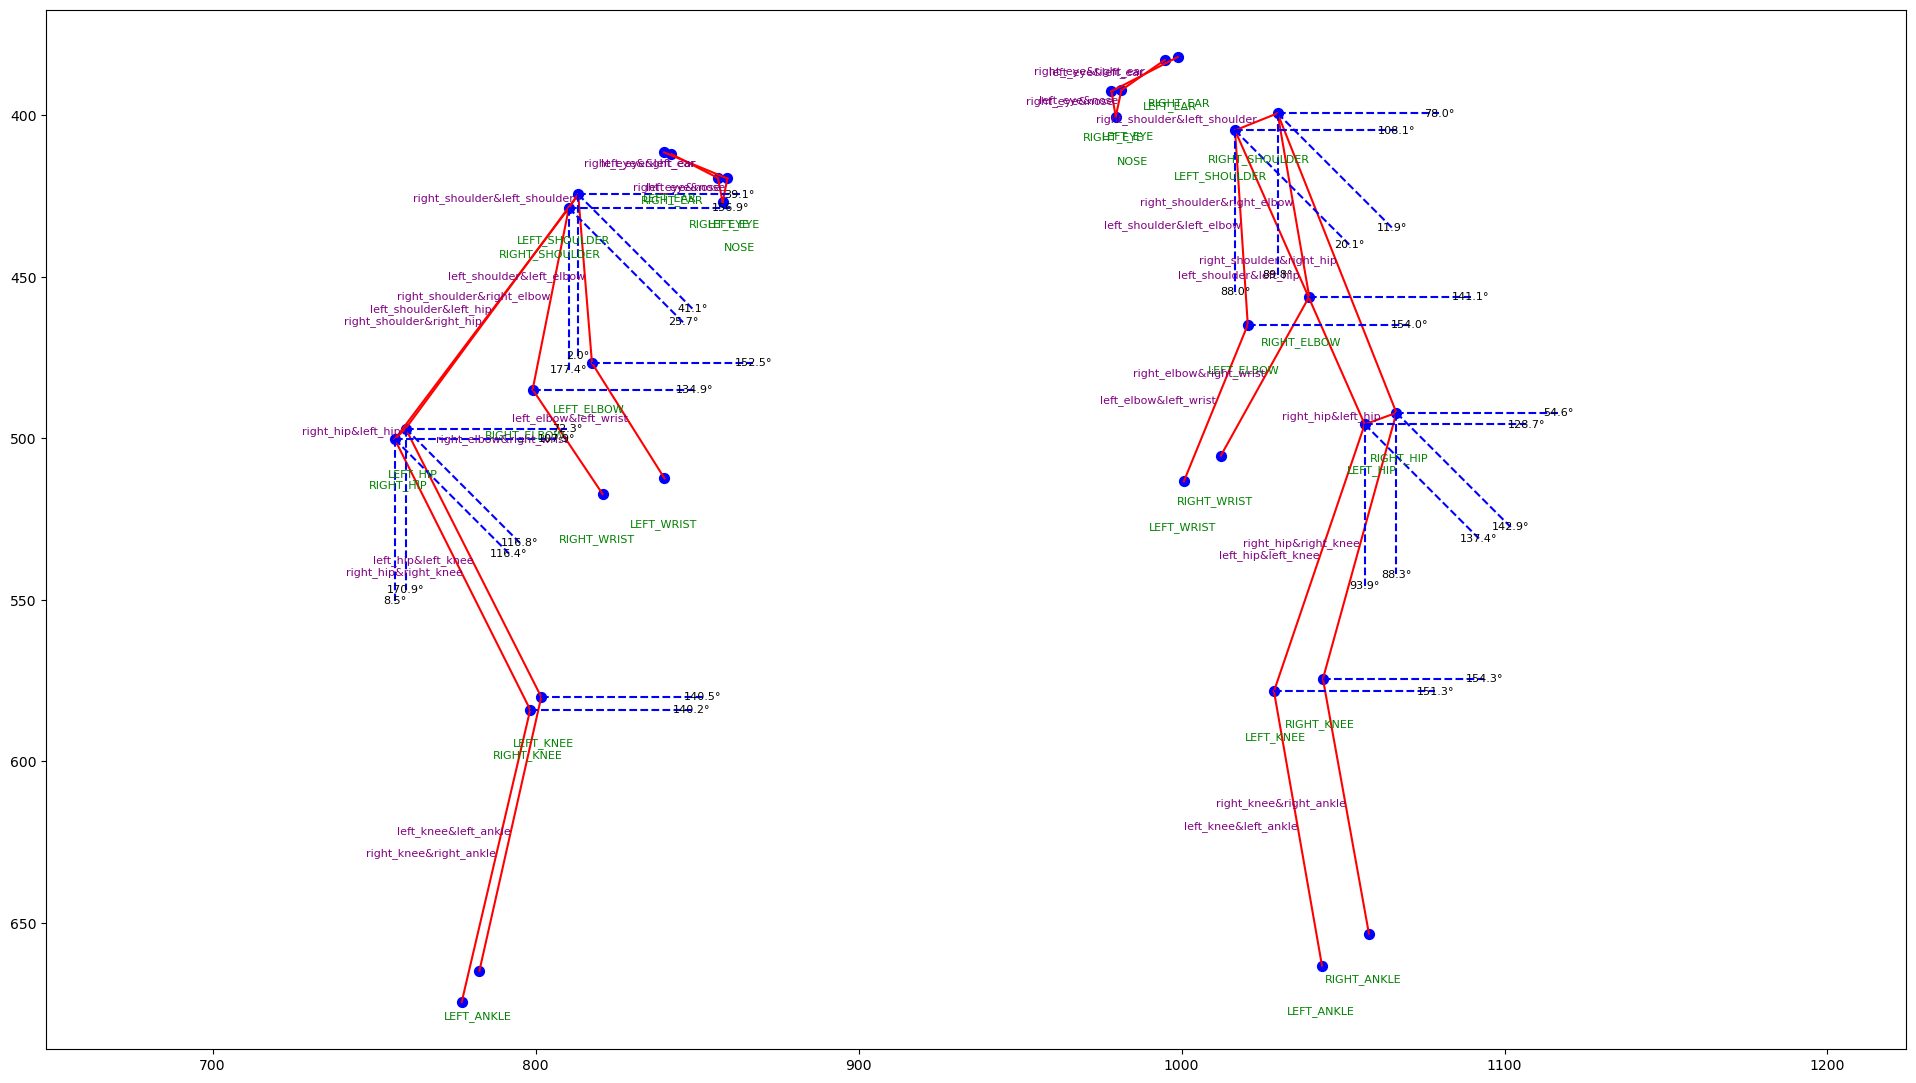

NO.1 person detected: 
[[     857.92      426.84]
 [     859.38      419.51]
 [     856.43      419.34]
 [     839.77      411.42]
 [     842.07      411.98]
 [     813.18      424.45]
 [     810.29      428.67]
 [     817.46      476.68]
 [     799.08      484.87]
 [      839.9      512.36]
 [     820.72      517.18]
 [     759.75      496.95]
 [     756.39      500.26]
 [     801.75      580.06]
 [     798.33      584.02]
 [      782.6      664.82]
 [     777.11      674.51]]
{'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist': '134.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder': '156.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip': '25.7°', 'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist': '152.5°', 'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder': '39.1°', 'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip': '41.1°', 'right_hip&right_knee - RIGH

In [10]:
# This modified function is used to generate information about two workers at the same time
def plot_keypoints_with_multiple_datasets(keypoints_datasets, limbs_template):
# By default, the DPI (dots per inch) in Matplotlib is set to 80. So, to get a figure of size 1920x1080, 
# we can set the width to 24 inches (1920/80) and the height to 13.5 inches (1080/80).
    plt.figure(figsize=(24, 13.5))
    POINT_LABEL_COLOR = 'green'
    LINE_LABEL_COLOR = 'purple'
    INDICATOR_LINE_COLOR = 'orange'
    ANGLE_INDICATOR_LINE_COLOR = 'blue'
    ANGLE_LABEL_COLOR = 'black'
    OFFSET_ANGLES = [0, 45, 90, 135, 180, 225, 270, 315]
    
    for keypoints_coords in keypoints_datasets:
        # Extract limbs based on current keypoints
        body_keypoints = BodyKeypoints(keypoints_coords)
        limbs = get_limbs_from_keypoints(body_keypoints)

        # Draw key points
        for idx, keypoint in enumerate(keypoints_coords):
            plt.scatter(*keypoint, s=50, color='blue')
            label_position = (keypoint[0] + 10, keypoint[1] + 15)
            plt.annotate(KEYPOINT_LABELS[idx], label_position, fontsize=8, ha='right', color=POINT_LABEL_COLOR)

        # Draw lines and add labels
        for limb_name, limb in limbs.items():
            x_values = [limb[0][0], limb[1][0]]
            y_values = [limb[0][1], limb[1][1]]
            plt.plot(x_values, y_values, 'r-')

            mid_x = sum(x_values) / 2
            mid_y = sum(y_values) / 2
            offset = 0.02
            indicator_end_x = mid_x + offset
            indicator_end_y = mid_y + offset
            plt.plot([mid_x, indicator_end_x], [mid_y, indicator_end_y], '--', color=INDICATOR_LINE_COLOR)
            plt.annotate(limb_name, (indicator_end_x, indicator_end_y), fontsize=8, ha='right', color=LINE_LABEL_COLOR)

        angle_offsets = {}

        # Calculate and annotate angles for adjacent limbs
        for limb_1_name, limb_2_name in adjacent_limbs:
            limb_1 = limbs[limb_1_name]
            limb_2 = limbs[limb_2_name]
            
            common_point = None
            for point in limb_1:
                if any(np.array_equal(point, p) for p in limb_2):
                    common_point = np.array(point)
                    break

            if common_point is None:
                continue

            # Get vector A and B
            vector_A = np.array(limb_1[1]) - np.array(limb_1[0]) if np.array_equal(limb_1[1], common_point) else np.array(limb_1[0]) - np.array(limb_1[1])
            vector_B = np.array(limb_2[1]) - np.array(limb_2[0]) if np.array_equal(limb_2[1], common_point) else np.array(limb_2[0]) - np.array(limb_2[1])

            angle = calculate_angle(vector_A, vector_B)

            # Determine the offset for multiple angles at the same point
            if common_point.tobytes() not in angle_offsets:
                angle_offsets[common_point.tobytes()] = 0
            else:
                angle_offsets[common_point.tobytes()] += 1

            offset_angle = OFFSET_ANGLES[angle_offsets[common_point.tobytes()] % len(OFFSET_ANGLES)]
            offset_dx = 50 * np.cos(np.radians(offset_angle))
            offset_dy = 50 * np.sin(np.radians(offset_angle))

            end_point = common_point + np.array([offset_dx, offset_dy])

            plt.plot([common_point[0], end_point[0]], [common_point[1], end_point[1]], linestyle='--', color=ANGLE_INDICATOR_LINE_COLOR)
            plt.annotate(f"{angle:.1f}°", end_point, fontsize=8, ha='center', va='center', color=ANGLE_LABEL_COLOR)

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

keypoints_data = results[0].keypoints.xy.cpu().numpy()
datasets_to_plot = [keypoints_data[i] for i in range(len(keypoints_data))]
plot_keypoints_with_multiple_datasets(datasets_to_plot, limbs)

for idx in range(len(keypoints_data)):
    print("NO.%d person detected: " %(idx+1))
    result_keypoint = keypoints_data[idx]
    print(result_keypoint)
    body_keypoints = BodyKeypoints(result_keypoint)
    limbs = get_limbs_from_keypoints(body_keypoints)
    angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)
    print(angle_info_dict)

In [11]:
# Assuming you have a variable 'results' containing multiple frames of keypoints
for idx in range(len(results)):
    keypoints_data = results[idx].keypoints.xy.cpu().numpy()
    
    print("Frame %d:" %(idx+1))
    
    for person_idx, result_keypoint in enumerate(keypoints_data):
        print("NO.%d person detected:" %(person_idx+1))
        print(result_keypoint)
        body_keypoints = BodyKeypoints(result_keypoint)
        limbs = get_limbs_from_keypoints(body_keypoints)
        angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)
        print(angle_info_dict)


Frame 1:
NO.1 person detected:
[[     857.92      426.84]
 [     859.38      419.51]
 [     856.43      419.34]
 [     839.77      411.42]
 [     842.07      411.98]
 [     813.18      424.45]
 [     810.29      428.67]
 [     817.46      476.68]
 [     799.08      484.87]
 [      839.9      512.36]
 [     820.72      517.18]
 [     759.75      496.95]
 [     756.39      500.26]
 [     801.75      580.06]
 [     798.33      584.02]
 [      782.6      664.82]
 [     777.11      674.51]]
{'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist': '134.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder': '156.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip': '25.7°', 'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist': '152.5°', 'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder': '39.1°', 'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip': '41.1°', 'right_hip&right_kne

In [3]:
# Get the output data, save it as a table
import pandas as pd

KEYPOINT_LABELS = [
    "NOSE", "LEFT_EYE", "RIGHT_EYE", "LEFT_EAR", "RIGHT_EAR", "LEFT_SHOULDER",
    "RIGHT_SHOULDER", "LEFT_ELBOW", "RIGHT_ELBOW", "LEFT_WRIST", "RIGHT_WRIST",
    "LEFT_HIP", "RIGHT_HIP", "LEFT_KNEE", "RIGHT_KNEE", "LEFT_ANKLE", "RIGHT_ANKLE"
]


# Create an empty DataFrame with the required columns
columns = ["Employee ID", "Frame"] + [f"{keypoint} (x, y)" for keypoint in KEYPOINT_LABELS]


angle_keys = [
    'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist',
    'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder',
    'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip',
    'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist',
    'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder',
    'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip',
    'right_hip&right_knee - RIGHT_KNEE - right_knee&right_ankle',
    'right_hip&right_knee - RIGHT_HIP - right_hip&left_hip',
    'right_hip&right_knee - RIGHT_HIP - right_shoulder&right_hip',
    'left_hip&left_knee - LEFT_KNEE - left_knee&left_ankle',
    'left_hip&left_knee - LEFT_HIP - right_hip&left_hip',
    'left_hip&left_knee - LEFT_HIP - left_shoulder&left_hip',
    'right_shoulder&left_shoulder - RIGHT_SHOULDER - right_shoulder&right_hip',
    'right_shoulder&left_shoulder - LEFT_SHOULDER - left_shoulder&left_hip',
    'right_hip&left_hip - RIGHT_HIP - right_shoulder&right_hip',
    'right_hip&left_hip - LEFT_HIP - left_shoulder&left_hip'
]



columns += angle_keys
df = pd.DataFrame(columns=columns)

for idx in range(len(results)):
    keypoints_data = results[idx].keypoints.xy.cpu().numpy()
    
    for person_idx, result_keypoint in enumerate(keypoints_data):
        body_keypoints = BodyKeypoints(result_keypoint)
        limbs = get_limbs_from_keypoints(body_keypoints)
        angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)

        # Create a dictionary for the row data
        row_data = {
            "Employee ID": person_idx + 1,  #"Employee ID" = person_idx + 1
            "Frame": idx + 1,
        }
        for label, keypoint in zip(KEYPOINT_LABELS, result_keypoint):
            row_data[f"{label} (x, y)"] = tuple(keypoint)

        for angle_key in angle_keys:
            angle_value = angle_info_dict.get(angle_key, None)
            if angle_value:
                angle_value = ''.join([char for char in angle_value if char.isdigit() or char == '.'])  # Keep only digits and the decimal point
            row_data[angle_key] = angle_value

        # Append the data to the DataFrame
        df = df.append(row_data, ignore_index=True)

# Print out the table representation
print(df)

# save DataFrame to a CSV file
df.to_csv("output.csv", index=False)

NameError: name 'BodyKeypoints' is not defined

In [21]:
df

,Employee ID,Frame,"NOSE (x, y)","LEFT_EYE (x, y)","RIGHT_EYE (x, y)","LEFT_EAR (x, y)","RIGHT_EAR (x, y)","LEFT_SHOULDER (x, y)","RIGHT_SHOULDER (x, y)","LEFT_ELBOW (x, y)",...,right_hip&right_knee - RIGHT_KNEE - right_knee&right_ankle,right_hip&right_knee - RIGHT_HIP - right_hip&left_hip,right_hip&right_knee - RIGHT_HIP - right_shoulder&right_hip,left_hip&left_knee - LEFT_KNEE - left_knee&left_ankle,left_hip&left_knee - LEFT_HIP - right_hip&left_hip,left_hip&left_knee - LEFT_HIP - left_shoulder&left_hip,right_shoulder&left_shoulder - RIGHT_SHOULDER - right_shoulder&right_hip,right_shoulder&left_shoulder - LEFT_SHOULDER - left_shoulder&left_hip,right_hip&left_hip - RIGHT_HIP - right_shoulder&right_hip,right_hip&left_hip - LEFT_HIP - left_shoulder&left_hip
0,1,1,"(857.9154, 426.84)","(859.3823, 419.50955)","(856.4292, 419.3431)","(839.7745, 411.42017)","(842.0666, 411.97623)","(813.18225, 424.45105)","(810.2936, 428.67206)","(817.45844, 476.68094)",...,140.2,107.9,116.4,140.5,72.3,116.8,177.4,2.0,8.5,170.9
1,2,1,"(979.61993, 400.3255)","(981.388, 392.14612)","(978.27686, 392.52176)","(994.7862, 382.8384)","(998.8226, 381.90912)","(1016.562, 404.60947)","(1029.7325, 399.33032)","(1020.50665, 464.79822)",...,154.3,54.6,142.9,151.3,128.7,137.4,89.8,88.0,88.3,93.9


In [44]:
# Get the output data, save it as a table
import pandas as pd
import matplotlib.pyplot as plt
from pydantic import BaseModel
import numpy as np
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')
footage = 'videos/frontal_fatigue_pose_straight.MOV'
# results = model(footage)
results = model.predict(footage, save=True, conf=0.5)

output_name = 'training_data/frontal_fatigue_pose_straight.csv'
fatigue_or_not = '1'

class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16
        
class BodyKeypoints:
    def __init__(self, keypoints):
        get_keypoint = GetKeypoint()
        self.NOSE = keypoints[get_keypoint.NOSE]
        self.LEFT_EYE = keypoints[get_keypoint.LEFT_EYE]
        self.RIGHT_EYE = keypoints[get_keypoint.RIGHT_EYE]
        self.LEFT_EAR = keypoints[get_keypoint.LEFT_EAR]
        self.RIGHT_EAR = keypoints[get_keypoint.RIGHT_EAR]
        self.LEFT_SHOULDER = keypoints[get_keypoint.LEFT_SHOULDER]
        self.RIGHT_SHOULDER = keypoints[get_keypoint.RIGHT_SHOULDER]
        self.LEFT_ELBOW = keypoints[get_keypoint.LEFT_ELBOW]
        self.RIGHT_ELBOW = keypoints[get_keypoint.RIGHT_ELBOW]
        self.LEFT_WRIST = keypoints[get_keypoint.LEFT_WRIST]
        self.RIGHT_WRIST = keypoints[get_keypoint.RIGHT_WRIST]
        self.LEFT_HIP = keypoints[get_keypoint.LEFT_HIP]
        self.RIGHT_HIP = keypoints[get_keypoint.RIGHT_HIP]
        self.LEFT_KNEE = keypoints[get_keypoint.LEFT_KNEE]
        self.RIGHT_KNEE = keypoints[get_keypoint.RIGHT_KNEE]
        self.LEFT_ANKLE = keypoints[get_keypoint.LEFT_ANKLE]
        self.RIGHT_ANKLE = keypoints[get_keypoint.RIGHT_ANKLE]
        
def get_limbs_from_keypoints(keypoints: BodyKeypoints):
    limbs = {
        "right_eye&nose": [keypoints.RIGHT_EYE, keypoints.NOSE],
        "right_eye&right_ear": [keypoints.RIGHT_EYE, keypoints.RIGHT_EAR],
        "left_eye&nose": [keypoints.LEFT_EYE, keypoints.NOSE],
        "left_eye&left_ear": [keypoints.LEFT_EYE, keypoints.LEFT_EAR],
        "right_shoulder&right_elbow": [keypoints.RIGHT_SHOULDER, keypoints.RIGHT_ELBOW],
        "right_elbow&right_wrist": [keypoints.RIGHT_ELBOW, keypoints.RIGHT_WRIST],
        "left_shoulder&left_elbow": [keypoints.LEFT_SHOULDER, keypoints.LEFT_ELBOW],
        "left_elbow&left_wrist": [keypoints.LEFT_ELBOW, keypoints.LEFT_WRIST],
        "right_hip&right_knee": [keypoints.RIGHT_HIP, keypoints.RIGHT_KNEE],
        "right_knee&right_ankle": [keypoints.RIGHT_KNEE, keypoints.RIGHT_ANKLE],
        "left_hip&left_knee": [keypoints.LEFT_HIP, keypoints.LEFT_KNEE],
        "left_knee&left_ankle": [keypoints.LEFT_KNEE, keypoints.LEFT_ANKLE],
        "right_shoulder&left_shoulder": [keypoints.RIGHT_SHOULDER, keypoints.LEFT_SHOULDER],
        "right_hip&left_hip": [keypoints.RIGHT_HIP, keypoints.LEFT_HIP],
        "right_shoulder&right_hip": [keypoints.RIGHT_SHOULDER, keypoints.RIGHT_HIP],
        "left_shoulder&left_hip": [keypoints.LEFT_SHOULDER, keypoints.LEFT_HIP]
    }
    return limbs

def calculate_and_get_angles_as_dict(keypoints_coords, limbs):
    angle_information = {}
    
    for limb_1_name, limb_2_name in adjacent_limbs:
        limb_1 = limbs[limb_1_name]
        limb_2 = limbs[limb_2_name]
        
        common_point = None
        for point in limb_1:
            if any(np.array_equal(point, p) for p in limb_2):
                common_point = point
                break
        
        if common_point is None:
            continue
        
        vector_A = np.array(limb_1[1]) - np.array(limb_1[0]) if np.array_equal(limb_1[1], common_point) else np.array(limb_1[0]) - np.array(limb_1[1])
        vector_B = np.array(limb_2[1]) - np.array(limb_2[0]) if np.array_equal(limb_2[1], common_point) else np.array(limb_2[0]) - np.array(limb_2[1])
        
        angle = calculate_angle(vector_A, vector_B)
        key = f"{limb_1_name} - {KEYPOINT_LABELS[np.where((result_keypoint == common_point).all(axis=1))[0][0]]} - {limb_2_name}"
        value = f"{angle:.1f}°"
        
        angle_information[key] = value
        
    return angle_information

def find_closest_person_distance(prev_coordinates, current_coordinate):
    """
    Returns the index of the person from the previous frame whose coordinates 
    are closest to the current_coordinate and the corresponding distance.
    """
    distances = [(idx, np.linalg.norm(np.array(prev_coord) - np.array(current_coordinate)))
                 for idx, prev_coord in enumerate(prev_coordinates) if prev_coord is not None]
    if distances:
        min_distance_item = min(distances, key=lambda x: x[1])
        return min_distance_item
    return None, float('inf')

adjacent_limbs = []

selected_limbs = [
        "right_shoulder&right_elbow",
        "right_elbow&right_wrist",
        "left_shoulder&left_elbow",
        "left_elbow&left_wrist",
        "right_hip&right_knee",
        "right_knee&right_ankle",
        "left_hip&left_knee",
        "left_knee&left_ankle",
        "right_shoulder&left_shoulder",
        "right_hip&left_hip",
        "right_shoulder&right_hip",
        "left_shoulder&left_hip"
    ]

# Generating all possible combinations
for i in range(len(selected_limbs)):
    for j in range(i + 1, len(selected_limbs)):
        limb1 = limbs[selected_limbs[i]]
        limb2 = limbs[selected_limbs[j]]
        
        # Convert keypoints to tuples for comparison
        limb1_tuples = [tuple(point) for point in limb1]
        limb2_tuples = [tuple(point) for point in limb2]

        # Checking if any keypoint in the second limb matches with the keypoints in the first limb
        if any(kp in limb1_tuples for kp in limb2_tuples):
            adjacent_limbs.append((selected_limbs[i], selected_limbs[j]))

KEYPOINT_LABELS = [
    "NOSE", "LEFT_EYE", "RIGHT_EYE", "LEFT_EAR", "RIGHT_EAR", "LEFT_SHOULDER",
    "RIGHT_SHOULDER", "LEFT_ELBOW", "RIGHT_ELBOW", "LEFT_WRIST", "RIGHT_WRIST",
    "LEFT_HIP", "RIGHT_HIP", "LEFT_KNEE", "RIGHT_KNEE", "LEFT_ANKLE", "RIGHT_ANKLE"
]

# Create an empty DataFrame with the required columns
columns = ["Employee ID", "Frame"] + [f"{keypoint} (x, y)" for keypoint in KEYPOINT_LABELS]


angle_keys = [
    'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist',
    'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder',
    'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip',
    'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist',
    'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder',
    'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip',
    'right_hip&right_knee - RIGHT_KNEE - right_knee&right_ankle',
    'right_hip&right_knee - RIGHT_HIP - right_hip&left_hip',
    'right_hip&right_knee - RIGHT_HIP - right_shoulder&right_hip',
    'left_hip&left_knee - LEFT_KNEE - left_knee&left_ankle',
    'left_hip&left_knee - LEFT_HIP - right_hip&left_hip',
    'left_hip&left_knee - LEFT_HIP - left_shoulder&left_hip',
    'right_shoulder&left_shoulder - RIGHT_SHOULDER - right_shoulder&right_hip',
    'right_shoulder&left_shoulder - LEFT_SHOULDER - left_shoulder&left_hip',
    'right_hip&left_hip - RIGHT_HIP - right_shoulder&right_hip',
    'right_hip&left_hip - LEFT_HIP - left_shoulder&left_hip'
]

def calculate_angle(A, B):
#     Calculate angle between two vectors A and B.
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return np.arccos(dot_product / (norm_A * norm_B)) * (180/np.pi)

columns = ["Employee ID", "Frame"] + [f"{label} (x, y)" for label in KEYPOINT_LABELS] + angle_keys + ["Fatigue or not"]
df = pd.DataFrame(columns=columns)

prev_person_coordinates = [None, None]  # Assuming at most two employees, initialize with None

for idx in range(len(results)):
    if idx < len(results):
        keypoints_data = results[idx].keypoints.xy.cpu().numpy()
    else:
        keypoints_data = []

    distances_and_indices = []

    for person_idx, result_keypoint in enumerate(keypoints_data):
        if len(result_keypoint) == 0:
            continue
        get_keypoint = GetKeypoint()
        nose_coordinate = tuple(result_keypoint[get_keypoint.NOSE])
        
        matched_person_idx, distance = find_closest_person_distance(prev_person_coordinates, nose_coordinate)
        distances_and_indices.append((distance, matched_person_idx, person_idx, result_keypoint))

    # Sort based on distances and select the top two
    sorted_matches = sorted(distances_and_indices, key=lambda x: x[0])[:2]
        
    for distance, matched_person_idx, person_idx, result_keypoint in sorted_matches:
        if matched_person_idx is not None:
            row_data["Employee ID"] = matched_person_idx + 1
            prev_person_coordinates[matched_person_idx] = tuple(result_keypoint[get_keypoint.NOSE])

        body_keypoints = BodyKeypoints(result_keypoint)
        limbs = get_limbs_from_keypoints(body_keypoints)
        angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)
#         print(angle_info_dict)

        # Create a dictionary for the row data
        row_data = {
            "Employee ID": person_idx + 1,  #"Employee ID" = person_idx + 1
            "Frame": idx + 1,
        }
        for label, keypoint in zip(KEYPOINT_LABELS, result_keypoint):
            row_data[f"{label} (x, y)"] = tuple(keypoint)

        for angle_key in angle_keys:
            angle_value = angle_info_dict.get(angle_key, None)
            if angle_value:
                angle_value = ''.join([char for char in angle_value if char.isdigit() or char == '.'])  # Keep only digits and the decimal point
            row_data[angle_key] = angle_value
        row_data['Fatigue or not'] = fatigue_or_not
        # Append the data to the DataFrame
        df = df.append(row_data, ignore_index=True)

# Print out the table representation
print(df)
# save DataFrame to a CSV file
df.to_csv(output_name, index=False)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 158.8ms
video 1/1 (2/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 134.7ms
video 1/1 (3/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 104.8ms
video 1/1 (4/874) /Users/ma

video 1/1 (55/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 111.8ms
video 1/1 (56/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 176.9ms
video 1/1 (57/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 142.5ms
video 1/1 (58/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 163.2ms
video 1/1 (59/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 114.0ms
video 1/1 (60/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 233.3ms
video 1/1 (61/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 

video 1/1 (112/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 175.6ms
video 1/1 (113/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 102.0ms
video 1/1 (114/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 97.0ms
video 1/1 (115/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 90.2ms
video 1/1 (116/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 89.8ms
video 1/1 (117/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 147.7ms
video 1/1 (118/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 perso

video 1/1 (169/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 143.9ms
video 1/1 (170/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 136.8ms
video 1/1 (171/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 133.0ms
video 1/1 (172/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 164.9ms
video 1/1 (173/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 123.3ms
video 1/1 (174/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 128.3ms
video 1/1 (175/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 pe

video 1/1 (226/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 125.5ms
video 1/1 (227/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 184.9ms
video 1/1 (228/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 176.5ms
video 1/1 (229/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 155.8ms
video 1/1 (230/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 120.0ms
video 1/1 (231/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 129.9ms
video 1/1 (232/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 pe

video 1/1 (283/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 89.2ms
video 1/1 (284/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 79.2ms
video 1/1 (285/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 80.8ms
video 1/1 (286/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 87.9ms
video 1/1 (287/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 84.3ms
video 1/1 (288/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 83.7ms
video 1/1 (289/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons,

video 1/1 (340/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 82.0ms
video 1/1 (341/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 89.6ms
video 1/1 (342/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 145.0ms
video 1/1 (343/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 122.7ms
video 1/1 (344/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 131.3ms
video 1/1 (345/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 78.8ms
video 1/1 (346/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 perso

video 1/1 (397/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 117.9ms
video 1/1 (398/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 142.6ms
video 1/1 (399/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 149.9ms
video 1/1 (400/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 121.9ms
video 1/1 (401/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 181.0ms
video 1/1 (402/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 89.7ms
video 1/1 (403/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 per

video 1/1 (454/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 126.5ms
video 1/1 (455/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 115.8ms
video 1/1 (456/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 113.8ms
video 1/1 (457/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 89.1ms
video 1/1 (458/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 86.4ms
video 1/1 (459/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 79.0ms
video 1/1 (460/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 perso

video 1/1 (511/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 110.3ms
video 1/1 (512/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 142.4ms
video 1/1 (513/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 139.7ms
video 1/1 (514/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 146.2ms
video 1/1 (515/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 111.0ms
video 1/1 (516/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 177.4ms
video 1/1 (517/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 pe

video 1/1 (568/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 176.0ms
video 1/1 (569/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 93.9ms
video 1/1 (570/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 84.1ms
video 1/1 (571/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 80.3ms
video 1/1 (572/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 84.4ms
video 1/1 (573/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 93.9ms
video 1/1 (574/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons

video 1/1 (625/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 138.0ms
video 1/1 (626/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 93.9ms
video 1/1 (627/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 94.6ms
video 1/1 (628/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 88.8ms
video 1/1 (629/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 86.5ms
video 1/1 (630/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 91.7ms
video 1/1 (631/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons

video 1/1 (682/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 164.5ms
video 1/1 (683/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 156.0ms
video 1/1 (684/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 132.5ms
video 1/1 (685/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 148.7ms
video 1/1 (686/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 95.1ms
video 1/1 (687/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 89.7ms
video 1/1 (688/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 pers

video 1/1 (739/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 159.5ms
video 1/1 (740/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 155.4ms
video 1/1 (741/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 93.2ms
video 1/1 (742/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 82.3ms
video 1/1 (743/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 126.7ms
video 1/1 (744/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 87.1ms
video 1/1 (745/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 perso

video 1/1 (796/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 114.5ms
video 1/1 (797/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 112.2ms
video 1/1 (798/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 108.6ms
video 1/1 (799/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 113.3ms
video 1/1 (800/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 116.5ms
video 1/1 (801/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 116.0ms
video 1/1 (802/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 pe

video 1/1 (853/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 121.6ms
video 1/1 (854/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 156.6ms
video 1/1 (855/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 125.2ms
video 1/1 (856/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 133.5ms
video 1/1 (857/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 125.1ms
video 1/1 (858/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 persons, 177.4ms
video 1/1 (859/874) /Users/macbook/Desktop/Git/tcs-fatigue-detection/models/videos/frontal_fatigue_pose_straight.MOV: 384x640 2 pe

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row_data, ignore_index=True)
/var/folders/n1/gzdnn7fx43324xp8l5rp6tth0000gn/T/ipykernel_10622/729686480.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

     Employee ID Frame             NOSE (x, y)         LEFT_EYE (x, y)  \
0              1     1   (1500.5039, 308.9286)  (1503.3508, 295.84305)   
1              2     1  (1667.8821, 465.04294)  (1672.5001, 454.25528)   
2              1     2  (1500.9427, 308.73096)  (1504.6481, 295.79034)   
3              2     2    (1662.805, 469.9481)  (1667.9467, 459.12445)   
4              1     3  (1503.1989, 310.97366)  (1506.1898, 297.83334)   
...          ...   ...                     ...                     ...   
1743           2   872    (686.4959, 318.2656)    (690.2038, 302.1569)   
1744           1   873    (38.12381, 257.7046)   (51.58403, 244.13324)   
1745           2   873   (685.70465, 318.2603)   (689.9308, 301.95776)   
1746           1   874  (35.493065, 259.63937)  (48.575798, 245.89682)   
1747           2   874    (687.5973, 319.3919)   (691.7614, 302.91907)   

            RIGHT_EYE (x, y)         LEFT_EAR (x, y)        RIGHT_EAR (x, y)  \
0     (1496.2607, 296.64825)   

In [15]:
df

,Employee ID,Frame,"NOSE (x, y)","LEFT_EYE (x, y)","RIGHT_EYE (x, y)","LEFT_EAR (x, y)","RIGHT_EAR (x, y)","LEFT_SHOULDER (x, y)","RIGHT_SHOULDER (x, y)","LEFT_ELBOW (x, y)",...,right_hip&right_knee - RIGHT_HIP - right_hip&left_hip,right_hip&right_knee - RIGHT_HIP - right_shoulder&right_hip,left_hip&left_knee - LEFT_KNEE - left_knee&left_ankle,left_hip&left_knee - LEFT_HIP - right_hip&left_hip,left_hip&left_knee - LEFT_HIP - left_shoulder&left_hip,right_shoulder&left_shoulder - RIGHT_SHOULDER - right_shoulder&right_hip,right_shoulder&left_shoulder - LEFT_SHOULDER - left_shoulder&left_hip,right_hip&left_hip - RIGHT_HIP - right_shoulder&right_hip,right_hip&left_hip - LEFT_HIP - left_shoulder&left_hip,Fatigue or not
0,1,1,"(857.9154, 426.84)","(859.3823, 419.50955)","(856.4292, 419.3431)","(839.7745, 411.42017)","(842.0666, 411.97623)","(813.18225, 424.45105)","(810.2936, 428.67206)","(817.45844, 476.68094)",...,107.9,116.4,140.5,72.3,116.8,177.4,2.0,8.5,170.9,1
1,2,1,"(979.61993, 400.3255)","(981.388, 392.14612)","(978.27686, 392.52176)","(994.7862, 382.8384)","(998.8226, 381.90912)","(1016.562, 404.60947)","(1029.7325, 399.33032)","(1020.50665, 464.79822)",...,54.6,142.9,151.3,128.7,137.4,89.8,88.0,88.3,93.9,1


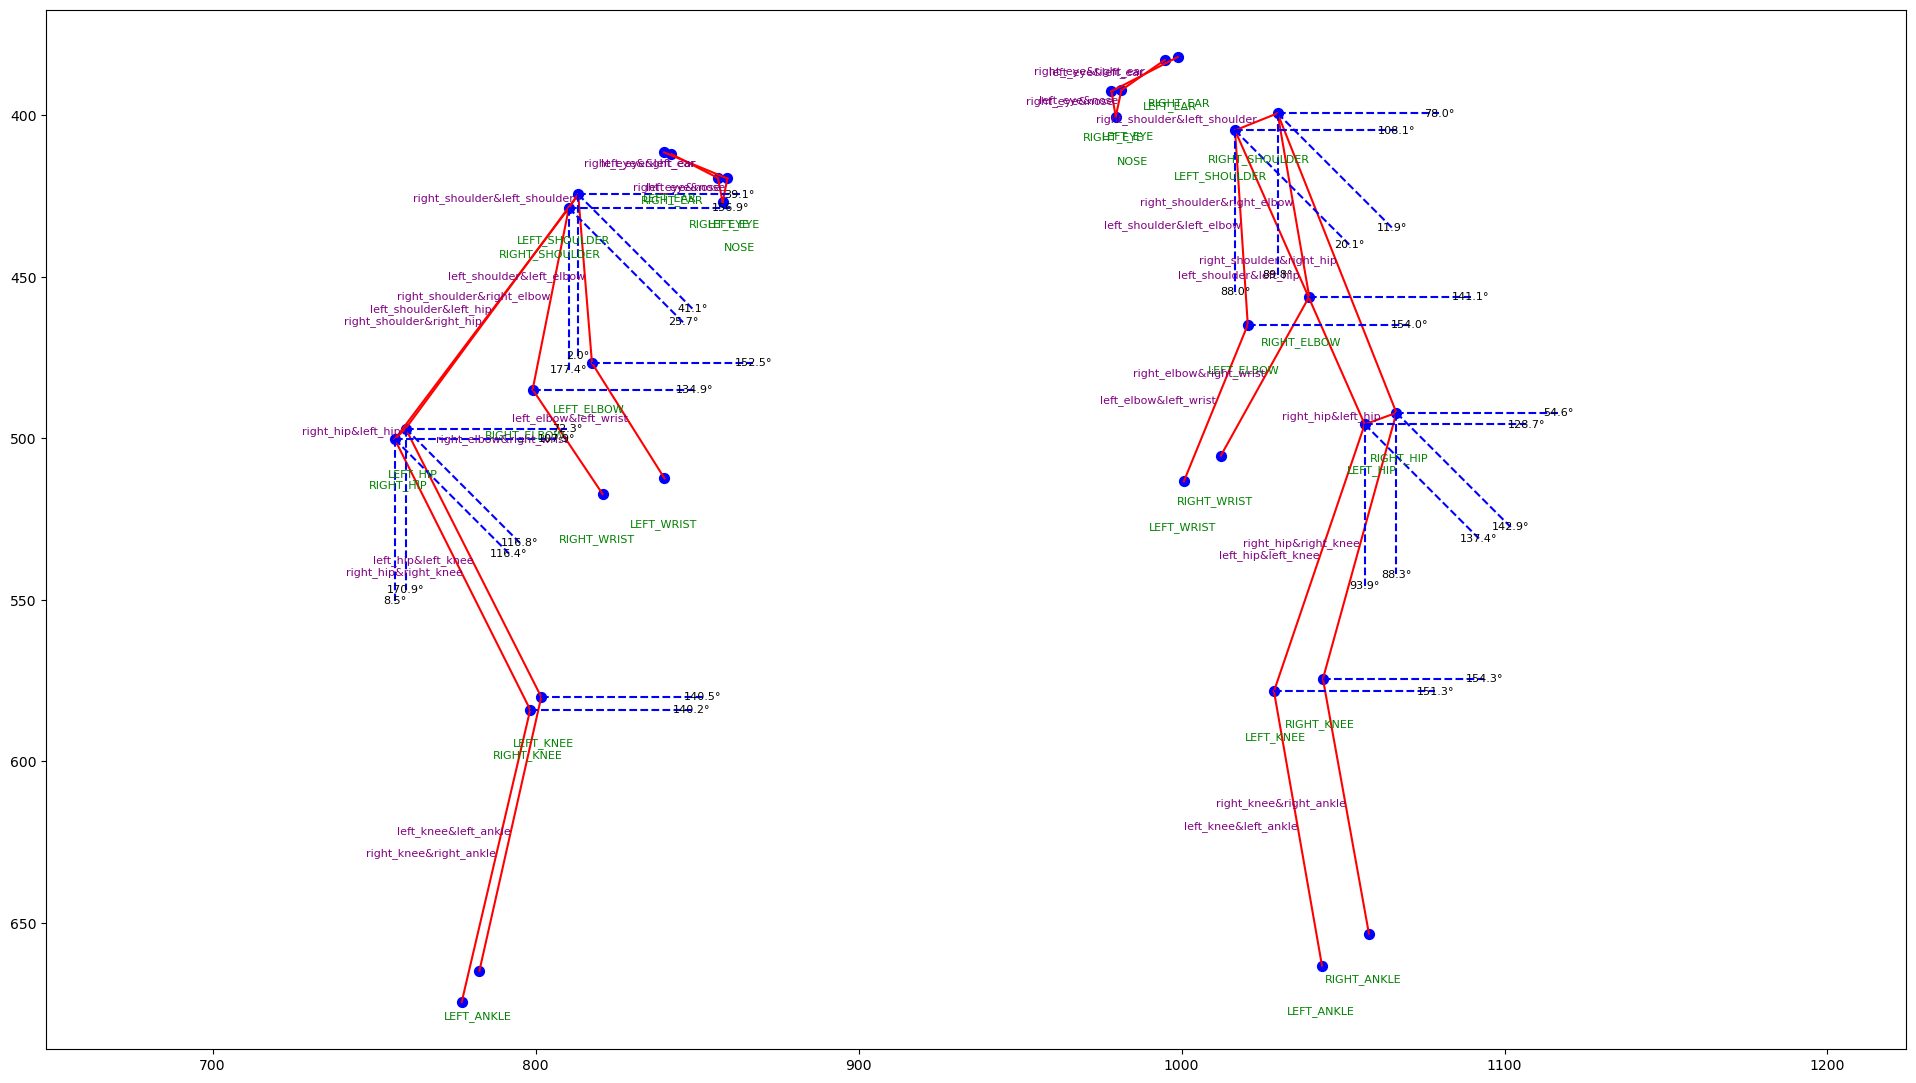

NO.1 person detected: 
[[     857.92      426.84]
 [     859.38      419.51]
 [     856.43      419.34]
 [     839.77      411.42]
 [     842.07      411.98]
 [     813.18      424.45]
 [     810.29      428.67]
 [     817.46      476.68]
 [     799.08      484.87]
 [      839.9      512.36]
 [     820.72      517.18]
 [     759.75      496.95]
 [     756.39      500.26]
 [     801.75      580.06]
 [     798.33      584.02]
 [      782.6      664.82]
 [     777.11      674.51]]
{'right_shoulder&right_elbow - RIGHT_ELBOW - right_elbow&right_wrist': '134.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&left_shoulder': '156.9°', 'right_shoulder&right_elbow - RIGHT_SHOULDER - right_shoulder&right_hip': '25.7°', 'left_shoulder&left_elbow - LEFT_ELBOW - left_elbow&left_wrist': '152.5°', 'left_shoulder&left_elbow - LEFT_SHOULDER - right_shoulder&left_shoulder': '39.1°', 'left_shoulder&left_elbow - LEFT_SHOULDER - left_shoulder&left_hip': '41.1°', 'right_hip&right_knee - RIGH

In [16]:
# This modified function is used to generate information about two workers at the same time
def plot_keypoints_with_multiple_datasets(keypoints_datasets, limbs_template):
# By default, the DPI (dots per inch) in Matplotlib is set to 80. So, to get a figure of size 1920x1080, 
# we can set the width to 24 inches (1920/80) and the height to 13.5 inches (1080/80).
    plt.figure(figsize=(24, 13.5))
    POINT_LABEL_COLOR = 'green'
    LINE_LABEL_COLOR = 'purple'
    INDICATOR_LINE_COLOR = 'orange'
    ANGLE_INDICATOR_LINE_COLOR = 'blue'
    ANGLE_LABEL_COLOR = 'black'
    OFFSET_ANGLES = [0, 45, 90, 135, 180, 225, 270, 315]

    for keypoints_coords in keypoints_datasets:
        # Extract limbs based on current keypoints
        body_keypoints = BodyKeypoints(keypoints_coords)
        limbs = get_limbs_from_keypoints(body_keypoints)

        # Draw key points
        for idx, keypoint in enumerate(keypoints_coords):
            plt.scatter(*keypoint, s=50, color='blue')
            label_position = (keypoint[0] + 10, keypoint[1] + 15)
            plt.annotate(KEYPOINT_LABELS[idx], label_position, fontsize=8, ha='right', color=POINT_LABEL_COLOR)

        # Draw lines and add labels
        for limb_name, limb in limbs.items():
            x_values = [limb[0][0], limb[1][0]]
            y_values = [limb[0][1], limb[1][1]]
            plt.plot(x_values, y_values, 'r-')

            mid_x = sum(x_values) / 2
            mid_y = sum(y_values) / 2
            offset = 0.02
            indicator_end_x = mid_x + offset
            indicator_end_y = mid_y + offset
            plt.plot([mid_x, indicator_end_x], [mid_y, indicator_end_y], '--', color=INDICATOR_LINE_COLOR)
            plt.annotate(limb_name, (indicator_end_x, indicator_end_y), fontsize=8, ha='right', color=LINE_LABEL_COLOR)

        angle_offsets = {}

        # Calculate and annotate angles for adjacent limbs
        for limb_1_name, limb_2_name in adjacent_limbs:
            limb_1 = limbs[limb_1_name]
            limb_2 = limbs[limb_2_name]
            
            common_point = None
            for point in limb_1:
                if any(np.array_equal(point, p) for p in limb_2):
                    common_point = np.array(point)
                    break

            if common_point is None:
                continue

            # Get vector A and B
            vector_A = np.array(limb_1[1]) - np.array(limb_1[0]) if np.array_equal(limb_1[1], common_point) else np.array(limb_1[0]) - np.array(limb_1[1])
            vector_B = np.array(limb_2[1]) - np.array(limb_2[0]) if np.array_equal(limb_2[1], common_point) else np.array(limb_2[0]) - np.array(limb_2[1])

            angle = calculate_angle(vector_A, vector_B)

            # Determine the offset for multiple angles at the same point
            if common_point.tobytes() not in angle_offsets:
                angle_offsets[common_point.tobytes()] = 0
            else:
                angle_offsets[common_point.tobytes()] += 1

            offset_angle = OFFSET_ANGLES[angle_offsets[common_point.tobytes()] % len(OFFSET_ANGLES)]
            offset_dx = 50 * np.cos(np.radians(offset_angle))
            offset_dy = 50 * np.sin(np.radians(offset_angle))

            end_point = common_point + np.array([offset_dx, offset_dy])

            plt.plot([common_point[0], end_point[0]], [common_point[1], end_point[1]], linestyle='--', color=ANGLE_INDICATOR_LINE_COLOR)
            plt.annotate(f"{angle:.1f}°", end_point, fontsize=8, ha='center', va='center', color=ANGLE_LABEL_COLOR)

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

keypoints_data = results[0].keypoints.xy.cpu().numpy()
datasets_to_plot = [keypoints_data[i] for i in range(len(keypoints_data))]
plot_keypoints_with_multiple_datasets(datasets_to_plot, limbs)

for idx in range(len(keypoints_data)):
    print("NO.%d person detected: " %(idx+1))
    result_keypoint = keypoints_data[idx]
    print(result_keypoint)
    body_keypoints = BodyKeypoints(result_keypoint)
    limbs = get_limbs_from_keypoints(body_keypoints)
    angle_info_dict = calculate_and_get_angles_as_dict(result_keypoint, limbs)
    print(angle_info_dict)